<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#「Pythonによるデータ科学入門」 DAY 8 のスライド中のコード

In [ ]:
# coding: utf-8
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

# 正規乱数発生
X = norm.rvs(loc=5, scale=2, size=100)
print('data=',X)

# 最尤推定
N = X.shape[0]
mu = np.mean(X)
print('mu=',mu)
sigma = np.std(X)
print('sigma=',sigma)

x = np.linspace(norm.ppf(0.001,loc=mu,scale=sigma), norm.ppf(0.999,loc=mu,scale=sigma), 100)

plt.hist(X,density=True,color=(0.2, 0.3, 0.9))
plt.plot(x,norm.pdf(x,loc=mu,scale=sigma),'-',color=(1.0,0,0.0),linewidth=1.0)
plt.xlim(min(x),max(x))
plt.xlabel('x')
plt.ylabel('P')
plt.grid(True)
plt.show()

In [ ]:
# coding: utf-8
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import math

# 乱数発生
X = beta.rvs(a=2, b=5, size=100)
print('data=',X)

# 最尤推定
a,b,_,_=beta.fit(X)
N = X.shape[0]
print('a=',a)
print('b=',b)

x = np.linspace(beta.ppf(0.01,a,b), beta.ppf(0.99,a,b), 100)

plt.hist(X,density=True,color=(0.2, 0.3, 0.9))
plt.plot(x,beta.pdf(x,a,b),'-',color=(1.0,0,0.0),linewidth=1.0)
plt.xlim(min(x),max(x))
plt.xlabel('x')
plt.ylabel('P')
plt.grid(True)
plt.show()


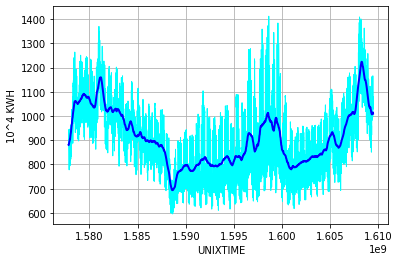

In [ ]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('juyo_2020_tohoku.txt', 
       encoding='Shift_JIS', skiprows=1)

date = data['DATE'].str.cat(data['TIME'],sep=" ")
datetime =  pd.to_datetime(date,format='%Y/%m/%d %H:%M')
unixtime = datetime.map(pd.Timestamp.timestamp)

x_raw = data['実績(万kW)'].tolist()
N = len(x_raw)
WSIZE = 72

x = []
for i in range(N):
    s = 0
    n = 0
    for j in range(i-WSIZE//2,i+WSIZE//2+1):
        if j>=0 and j<N:
            s = s + x_raw[j]
            n = n + 1
    x.append(s/n)

plt.plot(unixtime,x_raw, color=(0.0,1.0,1.0), linewidth=1.0)
plt.plot(unixtime,x, color=(0.0,0,1.0), linewidth=2.0)
plt.xlabel('UNIXTIME')
plt.ylabel('10^4 KWH')
plt.grid(True)
plt.show()

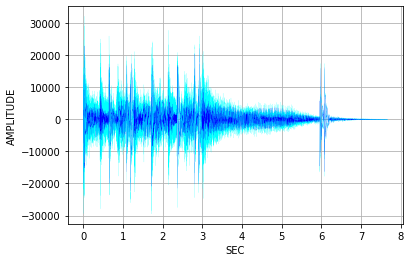

In [ ]:
# coding: utf-8
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

data = wavfile.read('chime.wav')

framerate = data[0]
x_raw = data[1]

N = len(x_raw)

WSIZE = 16

w = np.ones((WSIZE+1,))/(WSIZE+1)
y = np.convolve(w, x_raw,'same')
x = y.astype(np.int16)
frames=np.linspace(0,N/framerate,N)

plt.plot(frames,x_raw, color=(0.0,1.0,1.0), linewidth=0.1)
plt.plot(frames,x, color=(0.0,0,1.0), linewidth=0.1)
plt.xlabel('SEC')
plt.ylabel('AMPLITUDE')
plt.grid(True)
plt.show()

wavfile.write('soft_chime.wav',framerate,x)

In [ ]:
from IPython.display import Audio
# 移動平均前
Audio(x_raw,rate=framerate)

In [ ]:
# 移動平均後
Audio(x,rate=framerate)

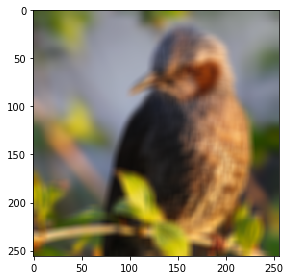

In [ ]:
# coding: utf-8
from skimage import io,img_as_float
image1 = io.imread('bulbul.png')
image2 = img_as_float(image1)

nx = image2.shape[0]
ny = image2.shape[1]

WSIZE=4
for x in range(nx):
    for y in range(ny):
        sr = sg = sb = 0
        n = 0
        for i in range(x-WSIZE//2,x+WSIZE//2+1):
            for j in range(y-WSIZE//2,y+WSIZE//2+1):
                if i>=0 and i<nx and j>=0 and j<ny:
                    sr = sr + image1[i,j,0]
                    sg = sg + image1[i,j,1]
                    sb = sb + image1[i,j,2]
                    n = n + 1
        image2[x,y,0] = sr/n/256
        image2[x,y,1] = sg/n/256
        image2[x,y,2] = sb/n/256

io.imshow(image2)
io.show()
io.imsave('bluered_bulbul.png', image2)


移動平均の範囲(WSIZE)をさらに広げて試行するときは、以下のコードも試してみてください。SciPyの二次元の畳み込み機能を使っているので高速です。

In [ ]:
# coding: utf-8                                                                                                                                                         
import numpy as np
from scipy import ndimage
from skimage import io,img_as_float
image1 = io.imread('bulbul.png')

WSIZE=32
w = np.ones((WSIZE+1,WSIZE+1))/(WSIZE+1)**2
r = ndimage.convolve(image1[:,:,0],w)
g = ndimage.convolve(image1[:,:,1],w)
b = ndimage.convolve(image1[:,:,2],w)
image2 = np.dstack([r,g,b])

io.imshow(image2)
io.show()
io.imsave('bluered_bulbul.png', image2)


In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('covid-19-patient.txt', skiprows=1)
days = data[:,0]
patients = data[:,1]

delta = np.diff(patients,prepend=0)

plt.scatter(days, patients, c=delta, cmap='bwr')
plt.xlabel('DAYS FROM JAN. 1, 2020')
plt.ylabel('NUMBER OF TEST-POSITIVE')
plt.xlim(0,700)
plt.ylim(0,30000)
plt.grid(True)
plt.colorbar()
plt.show()

https://matplotlib.org/3.3.2/gallery/color/color_by_yvalue.html
を参考に、差分の値の正負によって、プロットの色を変える例

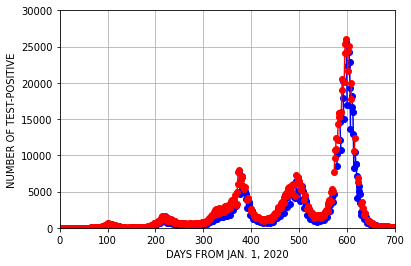

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('covid-19-patient.txt', skiprows=1)
days = data[:,0]
patients = data[:,1]
delta = np.diff(patients,prepend=0)

pinc = np.ma.masked_where(delta<0, patients)
pdec = np.ma.masked_where(delta>=0, patients)

plt.plot(days, pdec, '-o', color=(0,0,1))
plt.plot(days, pinc, '-o', color=(1,0,0))
plt.xlabel('DAYS FROM JAN. 1, 2020')
plt.ylabel('NUMBER OF TEST-POSITIVE')
plt.xlim(0,700)
plt.ylim(0,30000)
plt.grid(True)
plt.show()
